<a href="https://colab.research.google.com/github/harshakoneru98/city_watch/blob/main/data_processing/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import json
import tqdm
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
ROOT_PATH = "/content/drive/MyDrive/DSCI 560/Datasets/Cleaned_data/"

In [40]:
housing_df = pd.read_csv(f"{ROOT_PATH}/housing.csv")

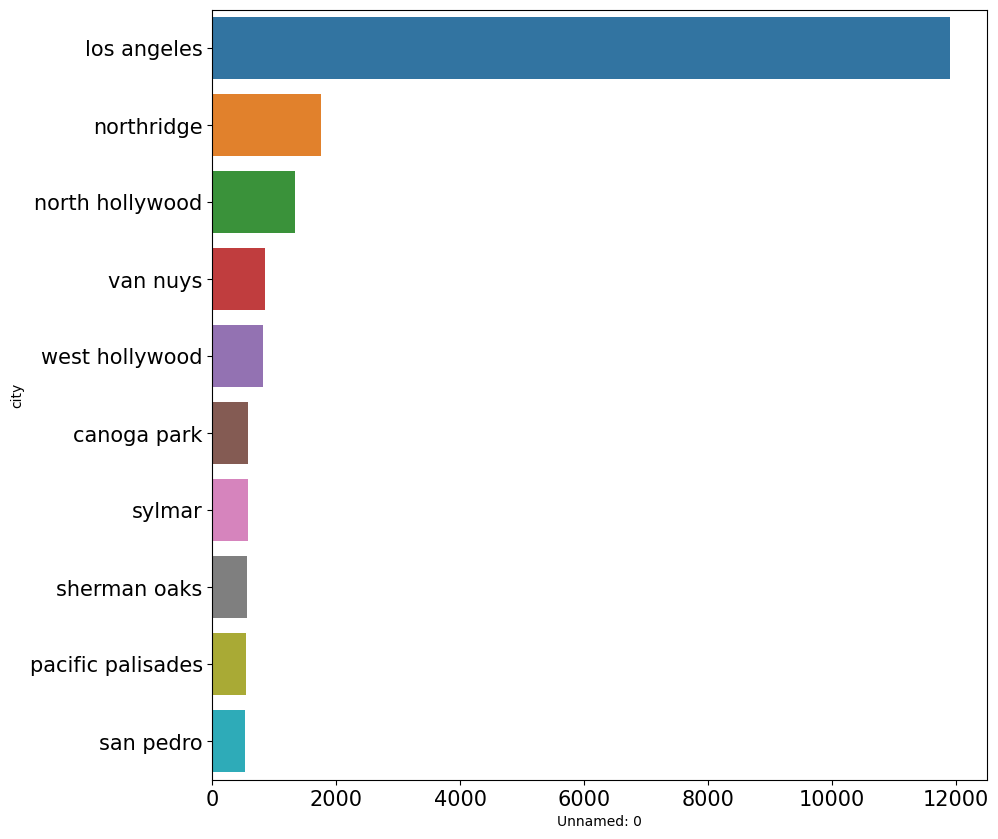

In [11]:
# top 10 residential areas in terms of number of houses
housing_df['city'] = housing_df.city.str.lower()
city_housing = housing_df.groupby("city").count()['Unnamed: 0'].reset_index().sort_values("Unnamed: 0", ascending= False)[:10]
plt.figure(figsize=(10, 10))
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
sns.barplot(city_housing, x = 'Unnamed: 0', y = 'city', orient = 'h')
plt.show()

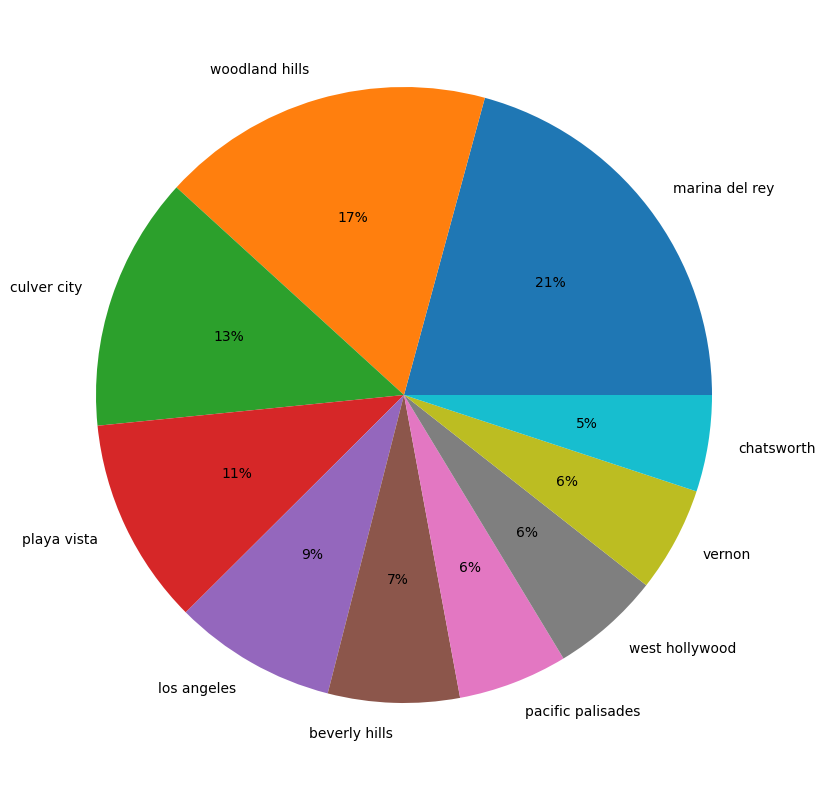

In [4]:
# top 10 cities to live
housing_df['city'] = housing_df.city.str.lower()
city_housing_price = housing_df.groupby("city").mean()['valuation'].reset_index().sort_values("valuation", ascending= False)[:10]
plt.figure(figsize=(10, 10))
plt.pie(x=city_housing_price['valuation'], labels=city_housing_price['city'], autopct='%.0f%%')
plt.show()

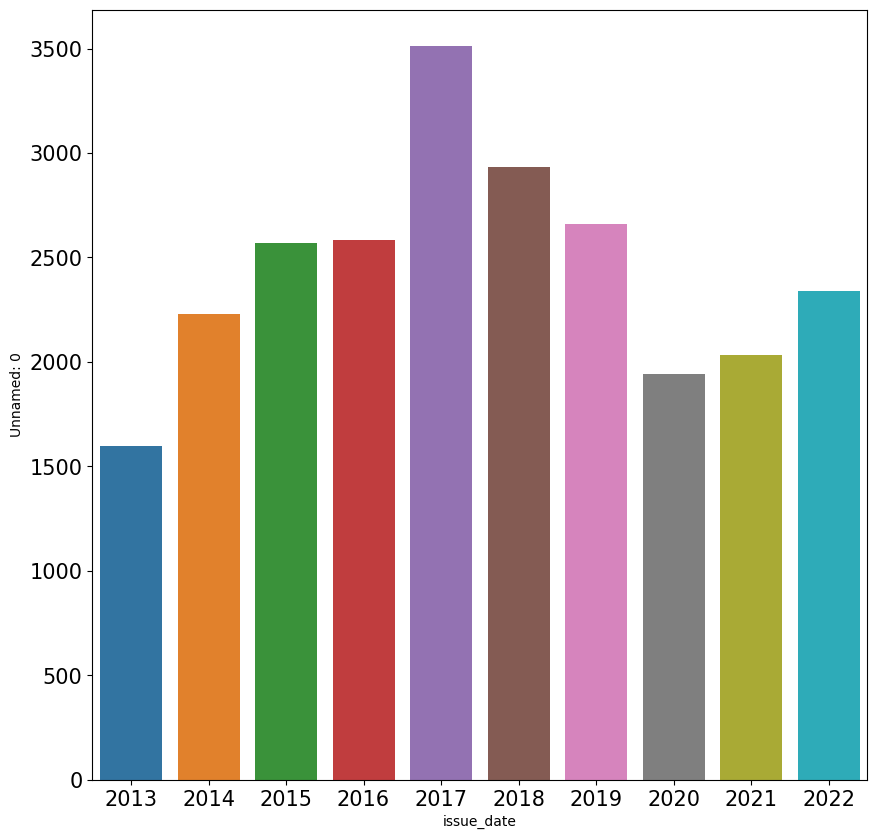

In [15]:
date_housing = housing_df.groupby(pd.to_datetime(housing_df.issue_date).dt.year).count()['Unnamed: 0'].reset_index().sort_values('Unnamed: 0', ascending= False)[:10]
plt.figure(figsize=(10, 10))
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
sns.barplot(date_housing, y = 'Unnamed: 0', x = 'issue_date')
plt.show()

In [17]:
business_df = pd.read_csv(f"{ROOT_PATH}/businesses.csv")

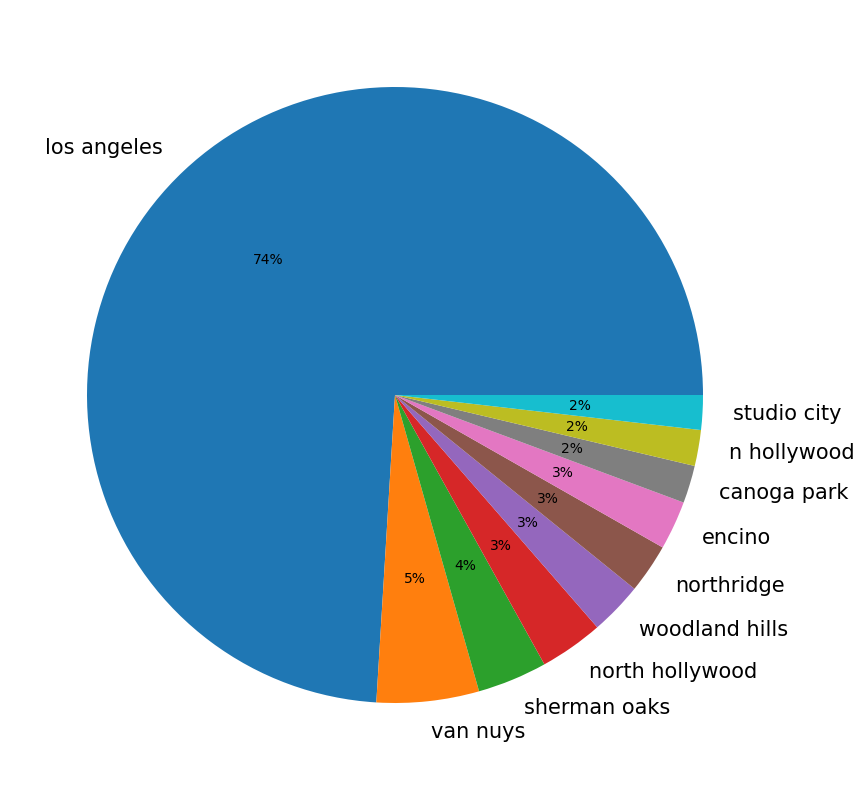

In [18]:
# top 10 areas in terms of highest business activitiy
city_business = business_df.groupby("city").count()['business_name'].reset_index().sort_values("business_name", ascending= False)[:10]
plt.figure(figsize=(10, 10))
plt.pie(x=city_business['business_name'], labels=city_business['city'], autopct='%.0f%%')
plt.show()

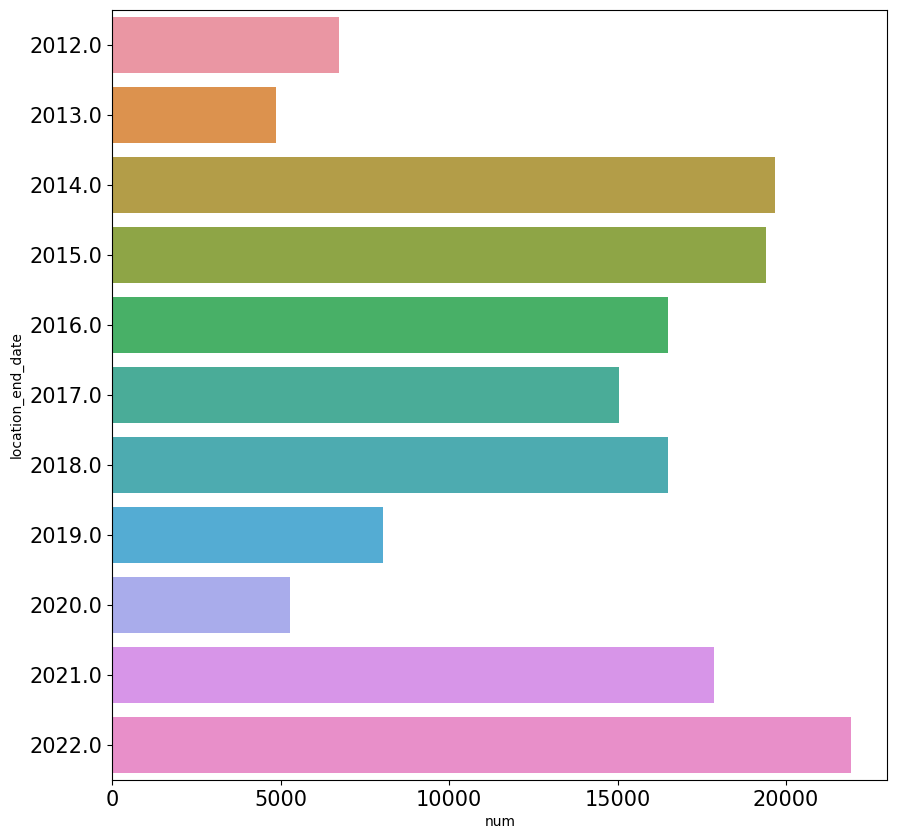

In [20]:
# yearly distribution of business activity
date_business = business_df.groupby(pd.to_datetime(business_df.location_end_date).dt.year).count()['business_name'].reset_index().sort_values("business_name", ascending= False)
sdate_business = business_df.groupby(pd.to_datetime(business_df.location_start_date).dt.year).count()['business_name'].reset_index().sort_values("business_name", ascending= False)
business_year = date_business.merge(right=sdate_business, how='outer', left_on='location_end_date', right_on='location_start_date').fillna(0)
business_year = business_year.sort_values(by='location_end_date')[-13:-2]
business_year['num'] = (business_year['business_name_y'] - business_year['business_name_x'])
plt.figure(figsize=(10, 10))
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
sns.barplot(data=business_year, y='location_end_date',x = 'num', orient = 'h')
plt.show()

In [22]:
crimes = pd.read_csv(f"{ROOT_PATH}/crime_date_aligned.csv")

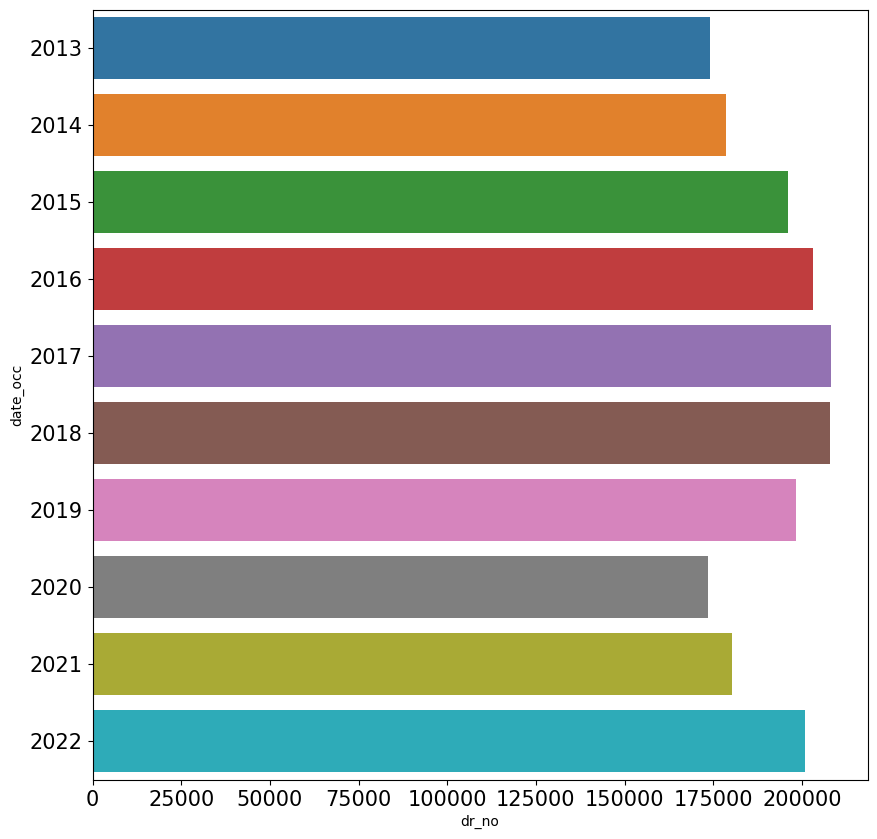

In [23]:
# yearly distribution of crimes
crime_date = crimes.groupby(pd.to_datetime(crimes['date_occ']).dt.year).count()['dr_no'].reset_index().sort_values('dr_no', ascending=False)[:10]
plt.figure(figsize=(10, 10))
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
sns.barplot(data=crime_date, y='date_occ',x = 'dr_no', orient = 'h')
plt.show()

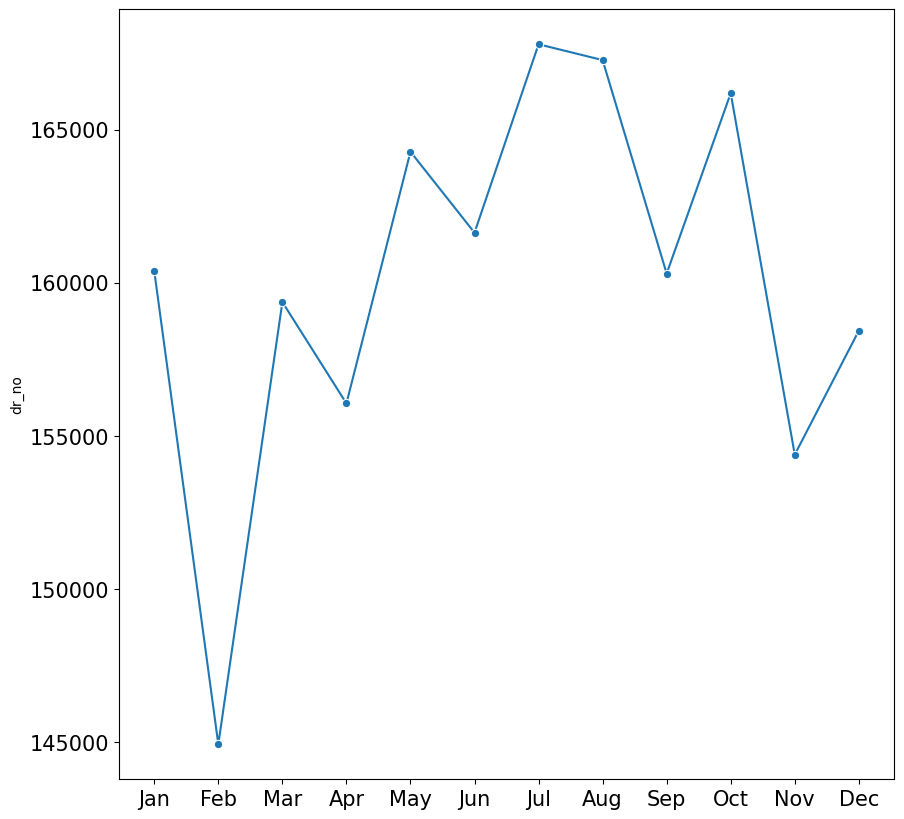

In [25]:
# monthy distribution of crimes
crime_month = crimes.groupby(pd.to_datetime(crimes['date_occ']).dt.month).count()['dr_no'].reset_index().sort_values('date_occ', ascending=True)
plt.figure(figsize=(10, 10))
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
sns.lineplot(data=crime_month,x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],y = 'dr_no', marker = 'o')
plt.show()

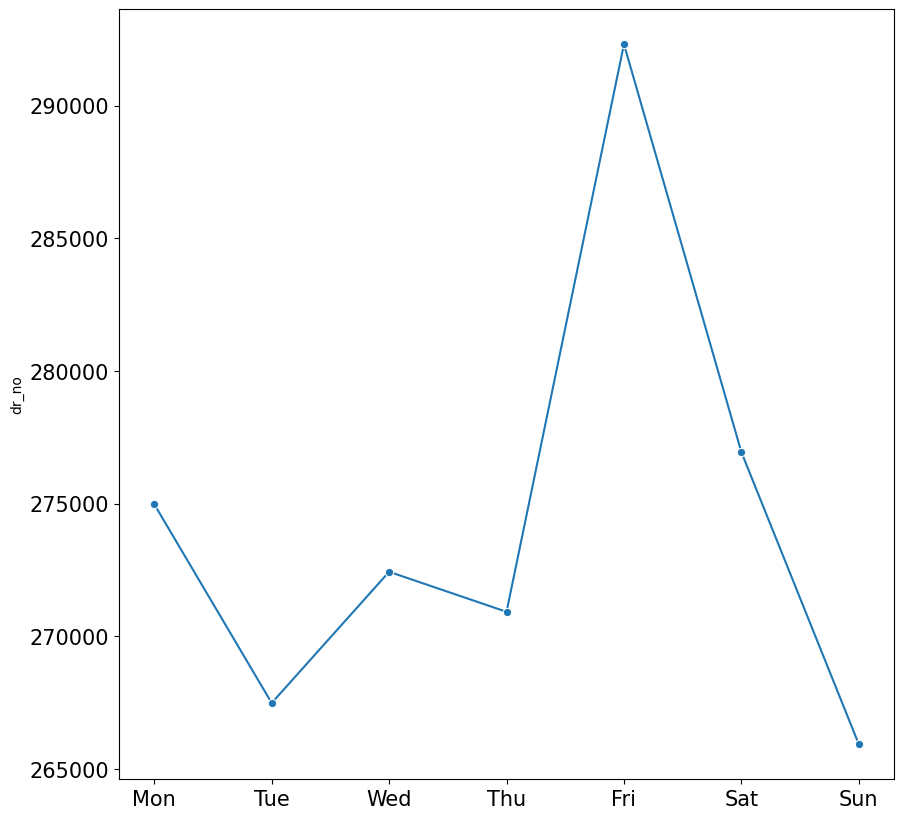

In [27]:
# week day distribution of crimes
crime_weekday = crimes.groupby(pd.to_datetime(crimes['date_occ']).dt.dayofweek).count()['dr_no'].reset_index().sort_values('date_occ', ascending=True)
plt.figure(figsize=(10, 10))
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
sns.lineplot(data=crime_weekday,x = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],y = 'dr_no', marker = 'o')
plt.show()

<ipython-input-36-1931c209f500>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crime_type_pareto = crime_type_pareto.append({ 'crm_cd_desc': 'OTHER', 'dr_no': total_number_of_crimes * 0.05, 'cum_sum': total_number_of_crimes * 0.7 }, ignore_index=True)


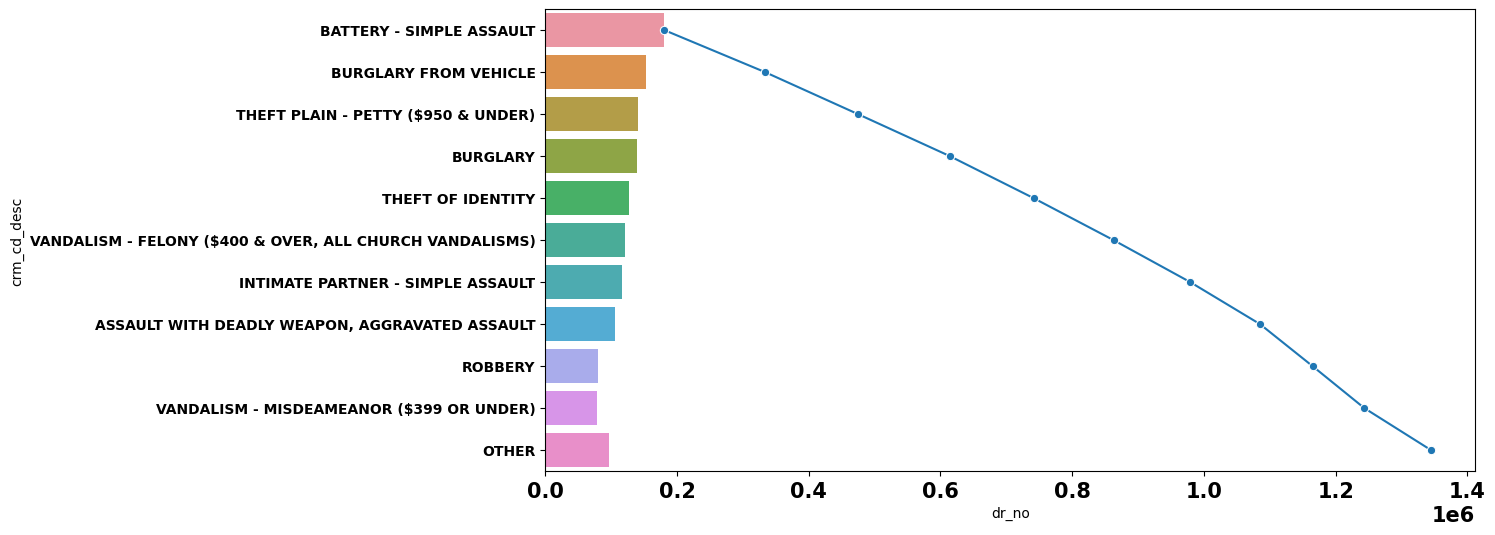

In [36]:
# crime type pareto analysis
crime_type = crimes.groupby(crimes['crm_cd_desc']).count()['dr_no'].reset_index().sort_values('dr_no', ascending=False)
crime_type['cum_sum'] = crime_type.dr_no.cumsum()
total_number_of_crimes = crime_type.cum_sum.iloc[-1]
crime_type_pareto = crime_type[crime_type.cum_sum <= total_number_of_crimes * 0.65]
crime_type_pareto = crime_type_pareto.append({ 'crm_cd_desc': 'OTHER', 'dr_no': total_number_of_crimes * 0.05, 'cum_sum': total_number_of_crimes * 0.7 }, ignore_index=True)
matplotlib.rc_file_defaults()
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('font', weight='bold')

fig, ax1 = plt.subplots(figsize=(12,6))


sns.lineplot(data = crime_type_pareto, x='cum_sum', y='crm_cd_desc', marker='o', ax=ax1, orient='x')
sns.barplot(data = crime_type_pareto, x='dr_no', y='crm_cd_desc', ax=ax1, orient='h')
plt.show()

In [41]:
# housing and crime correlation
zip_city = {v:k for k, v in housing_df[['city', 'zip_code']].values.tolist()}
crimes['city'] = crimes['zip_code'].map(lambda x: zip_city.get(x, 'None'))
new_housing_df = housing_df[housing_df.of_residential_dwelling_units == 1]
new_housing_df = new_housing_df[housing_df.of_stories == 1]
new_housing_df = new_housing_df[housing_df.floor_area_l_a_building_code_definition >= 2387.000000]
crime_city_date = crimes.groupby(['city', pd.to_datetime(crimes['date_occ']).dt.year]).count()['dr_no'].reset_index().sort_values('city', ascending=True)
housing_city_date = new_housing_df.groupby(['city', pd.to_datetime(housing_df['issue_date']).dt.year]).mean()['valuation'].reset_index().sort_values('city', ascending=True)
housing_crime = housing_city_date.merge(right=crime_city_date, left_on = ['city', 'issue_date'], right_on = ['city', 'date_occ'])[['city', 'issue_date', 'dr_no', 'valuation']]
housing_crime

<ipython-input-41-b6d5e182c355>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_housing_df = new_housing_df[housing_df.of_stories == 1]
<ipython-input-41-b6d5e182c355>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_housing_df = new_housing_df[housing_df.floor_area_l_a_building_code_definition >= 2387.000000]


,city,issue_date,dr_no,valuation
0,arleta,2020,2212,2.000000e+05
1,beverly hills,2015,355,9.300000e+05
2,beverly hills,2017,279,1.400000e+06
3,beverly hills,2022,286,2.300000e+06
4,canoga park,2019,7773,2.750000e+05
...,...,...,...,...
148,woodland hills,2013,2006,3.850000e+05
149,woodland hills,2016,2508,4.200000e+05
150,woodland hills,2018,2326,4.800000e+05
151,woodland hills,2019,2140,6.155000e+05


In [43]:
def standardize(df, column):
  m = df[column].mean()
  std = df[column].std()
  df[column] -= m;
  df[column] /= std;

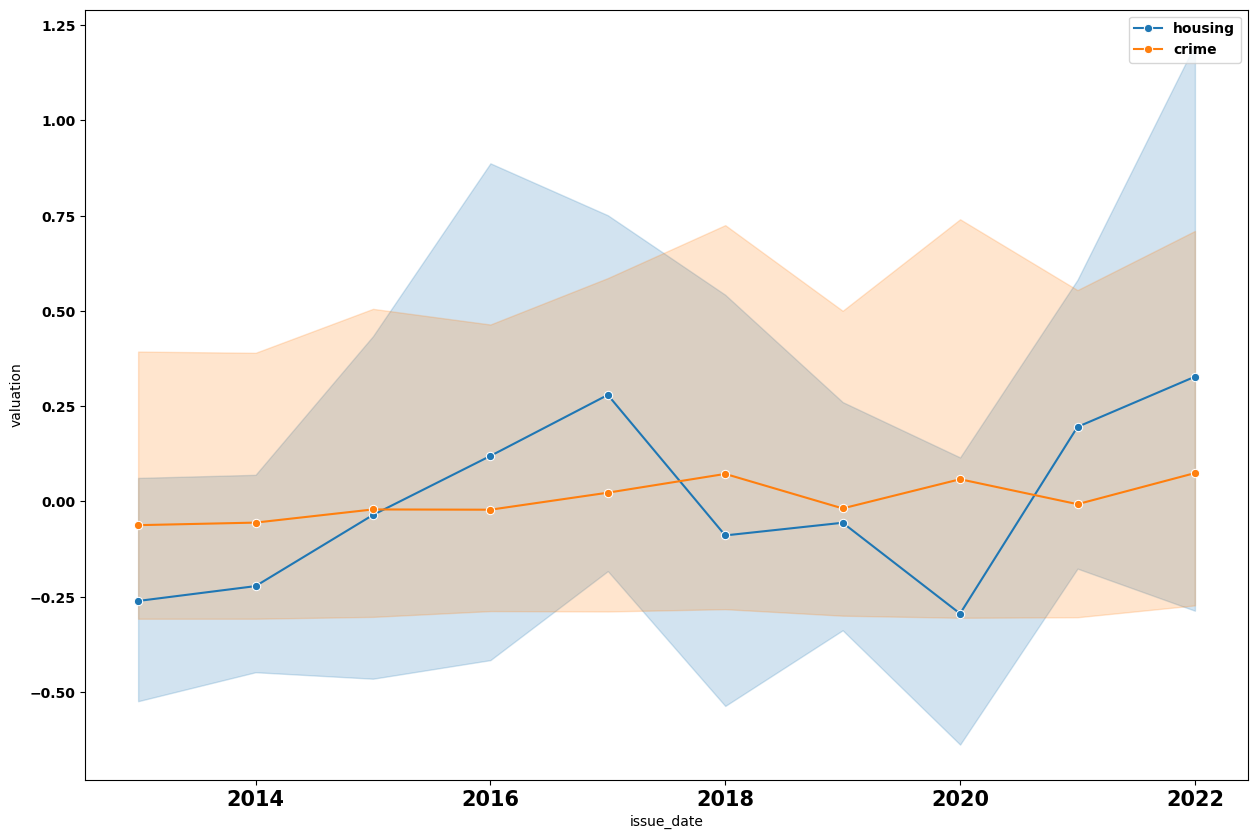

In [44]:
standardize(housing_crime, 'valuation')
standardize(housing_crime, 'dr_no')
plt.figure(figsize=(15, 10))
g = sns.lineplot(housing_crime,x='issue_date', y = 'valuation', marker = 'o', estimator = 'mean')
sns.lineplot(housing_crime,x='issue_date', y = 'dr_no', marker = 'o',  estimator = 'mean', ax = g)
g.legend(handles=g.lines[:2], labels=["housing", "crime"])